# Random Forest Regression

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
file_name = 'realistic_housing_data.xlsx'
df = pd.read_excel(file_name)

In [47]:
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"Features: {df.columns.tolist()}")


📊 Dataset Shape: (5000, 15)
Features: ['bedrooms', 'bathrooms', 'sqft', 'lot_size', 'age', 'year_built', 'garage', 'location', 'house_type', 'condition', 'has_pool', 'has_fireplace', 'has_basement', 'school_rating', 'price']


In [48]:
print("\n📈 Dataset Info:")
print(df.info())


📈 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bedrooms       5000 non-null   int64 
 1   bathrooms      5000 non-null   int64 
 2   sqft           5000 non-null   int64 
 3   lot_size       5000 non-null   int64 
 4   age            5000 non-null   int64 
 5   year_built     5000 non-null   int64 
 6   garage         5000 non-null   int64 
 7   location       5000 non-null   object
 8   house_type     5000 non-null   object
 9   condition      5000 non-null   int64 
 10  has_pool       5000 non-null   int64 
 11  has_fireplace  5000 non-null   int64 
 12  has_basement   5000 non-null   int64 
 13  school_rating  5000 non-null   int64 
 14  price          5000 non-null   int64 
dtypes: int64(13), object(2)
memory usage: 586.1+ KB
None


In [49]:
print("\n📋 First 5 rows:")
df.head()


📋 First 5 rows:


,bedrooms,bathrooms,sqft,lot_size,age,year_built,garage,location,house_type,condition,has_pool,has_fireplace,has_basement,school_rating,price
0,3,5,2229,12569,38,1986,1,Rural,Condo,4,0,1,0,10,199148
1,3,2,1897,8942,27,1997,3,Rural,Townhouse,3,0,0,1,3,152932
2,4,2,2397,4826,46,1978,0,Downtown,Townhouse,2,0,0,0,6,230854
3,5,3,2849,2490,39,1985,2,Hills,House,3,0,1,1,4,263271
4,2,3,1895,11910,41,1983,1,Downtown,Townhouse,4,0,0,0,5,274804


In [50]:
print("\n📊 Statistical Summary:")
print(df.describe())


📊 Statistical Summary:
         bedrooms    bathrooms         sqft      lot_size          age  \
count  5000.00000  5000.000000  5000.000000   5000.000000  5000.000000   
mean      3.20160     2.410600  2160.496600   8090.264200    24.581000   
std       1.28019     1.066881   436.624535   3021.882128    14.316132   
min       1.00000     1.000000   858.000000   1000.000000     0.000000   
25%       2.00000     2.000000  1851.000000   5918.250000    12.000000   
50%       3.00000     2.000000  2153.000000   8124.000000    25.000000   
75%       4.00000     3.000000  2455.250000  10211.000000    37.000000   
max       6.00000     5.000000  3620.000000  19332.000000    49.000000   

        year_built       garage    condition     has_pool  has_fireplace  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean   1999.419000     1.384600     3.259600     0.197000       0.404400   
std      14.316132     0.904238     0.975089     0.397772       0.490825   
min  

In [51]:
df.isnull().sum()

bedrooms         0
bathrooms        0
sqft             0
lot_size         0
age              0
year_built       0
garage           0
location         0
house_type       0
condition        0
has_pool         0
has_fireplace    0
has_basement     0
school_rating    0
price            0
dtype: int64

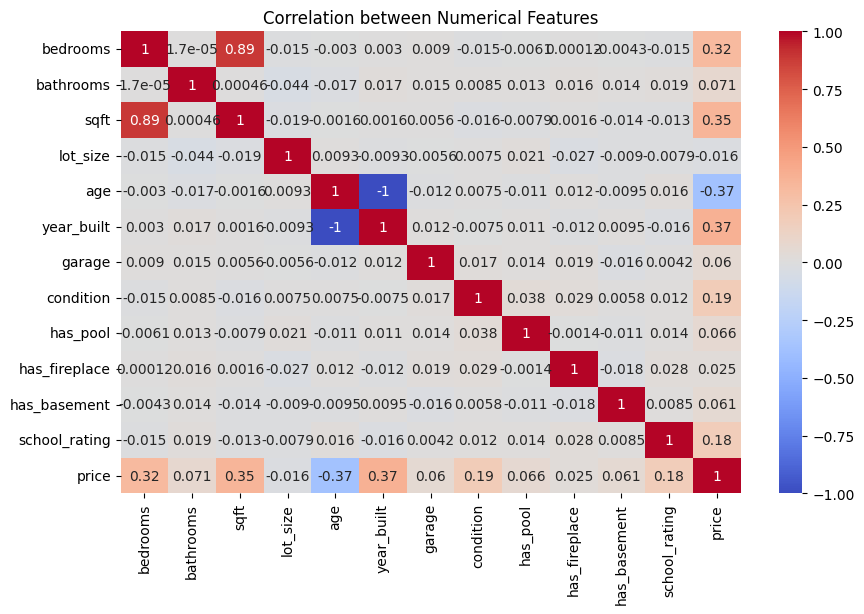

In [52]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation between Numerical Features")
plt.show()

In [ ]:
# Split features and target
X = df.drop("price", axis=1)
y = df["price"]

In [53]:
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns

In [54]:
print(categorical_features)
print(numerical_features)

Index(['location', 'house_type'], dtype='object')
Index(['bedrooms', 'bathrooms', 'sqft', 'lot_size', 'age', 'year_built',
       'garage', 'condition', 'has_pool', 'has_fireplace', 'has_basement',
       'school_rating'],
      dtype='object')


If column City = ['Delhi', 'Mumbai'], then after encoding:

id  city
1    delhi
2    Mumbai

id |City_Delhi | City_Mumbai
 1    1     |      0
 2    0     |      1

price = 10, 100, 601, 6000, 100000  --> 2.2, 4.3, -1.8, 1.9

In [55]:
# Create ColumnTransformer for encoding
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ("scale", StandardScaler(), numerical_features)
])


In [56]:
# Build the pipeline with RandomForestRegressor
pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])

In [57]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [58]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['location', 'house_type'], dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['bedrooms', 'bathrooms', 'sqft', 'lot_size', 'age', 'year_built',
       'garage', 'condition', 'has_pool', 'has_fireplace', 'has_basement',
       'school_rating'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

In [59]:
# Predict on test data
y_pred = pipeline.predict(X_test)


In [ ]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation:")
print(f"Mean Absolute Error (MAE): ₹{mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ₹{rmse:.2f}")
print(f"R² Score: {r2:.2f}")

📊 Model Evaluation:
Mean Absolute Error (MAE): ₹38710.34
Root Mean Squared Error (RMSE): ₹52685.84
R² Score: 0.88


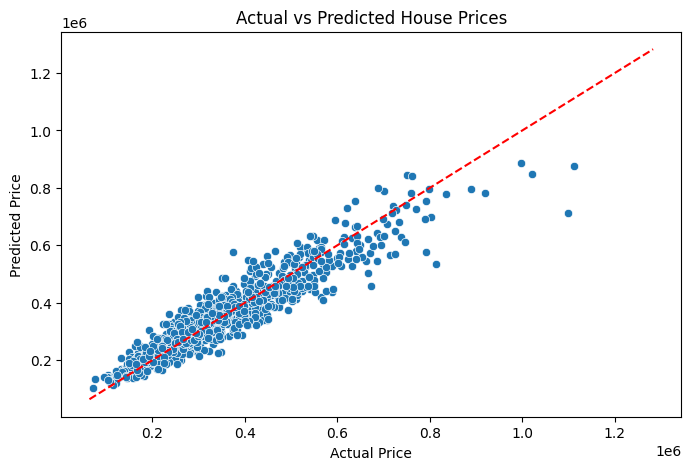

In [61]:
# Actual vs Predicted plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.show()